In [20]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [21]:
results_path = 'saves/results'
output_path = 'outputs'
files = []
for r, d, f in os.walk(results_path):
    for file in f:
        if file.endswith('.pickle'):
            files.append(os.path.join(results_path,file))
            
if not os.path.exists(output_path):
    os.mkdir(output_path)

In [42]:
file = 'saves/results/DynaQ_200_11032022_165645.pickle'
base_name = os.path.splitext(os.path.basename(file))[0]
with (open(file, "rb")) as openfile:
    data = pickle.load(openfile)
agent_type = data['agent_type']
q_values = data['q_values']
n_rewards = data['n_rewards']
n_state_visits = data['n_state_visits']
episodes = data['episodes']

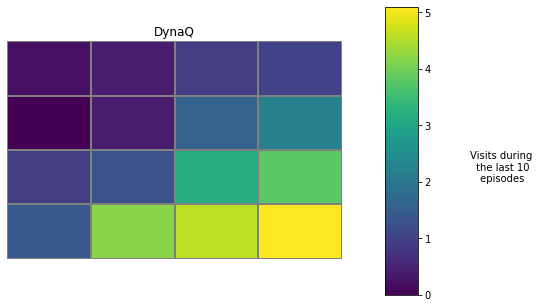

In [43]:
average_state_visits = np.array(n_state_visits[-10:]).mean(axis=0)
average_state_visits=average_state_visits[:16]
grid_state_visits = average_state_visits.reshape((4,4))
plt.pcolormesh(grid_state_visits, edgecolors='gray', linewidth=2)
plt.axis('off')
plt.title(agent_type)
cax = plt.axes([1, 0.0, 0.075, 1.])
cbar = plt.colorbar(cax=cax)
cbar.ax.set_ylabel("Visits during\n the last 10\n episodes", rotation=0, labelpad=70)
plt.show()

In [37]:
q_values.shape

(16, 4)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

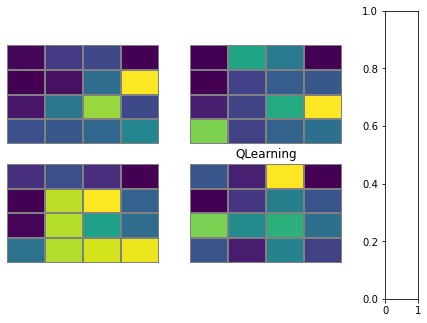

In [41]:
fig, axs = plt.subplots(2, 2)
grid_state_visits = q_values[:,0].reshape((4,4))
axs[0, 0].pcolormesh(grid_state_visits, edgecolors='gray', linewidth=2)
grid_state_visits = q_values[:,1].reshape((4,4))
axs[0, 1].pcolormesh(grid_state_visits, edgecolors='gray', linewidth=2)
grid_state_visits = q_values[:,2].reshape((4,4))
axs[1, 0].pcolormesh(grid_state_visits, edgecolors='gray', linewidth=2)
grid_state_visits = q_values[:,3].reshape((4,4))
axs[1, 1].pcolormesh(grid_state_visits, edgecolors='gray', linewidth=2)
axs[0, 0].axis('off')
axs[0, 1].axis('off')
axs[1, 0].axis('off')
axs[1, 1].axis('off')
plt.title(agent_type)
cax = plt.axes([1, 0.0, 0.075, 1.])
cbar = plt.colorbar(cax=cax)
cbar.ax.set_ylabel("Q Values during\n the last 10\n episodes", rotation=0, labelpad=70)
plt.show()

In [17]:
plt.style.use('_mpl-gallery-nogrid')
fig, ax = plt.subplots()
ax.imshow(average_state_visits.reshape((4, 4)))
plt.show()

OSError: '_mpl-gallery-nogrid' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles